In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Display all columns
pd.set_option("display.max_columns", None)

sns.set_style("darkgrid")

# Load datasets
flights_df = pd.read_csv(
    "../data/US 2023 Civil Flights  delays meteo and aircrafts/US_flights_2023.csv"
)
weather_df = pd.read_csv(
    "../data/US 2023 Civil Flights  delays meteo and aircrafts/weather_meteo_by_airport.csv"
)
cancelled_diverted_df = pd.read_csv(
    "../data/US 2023 Civil Flights  delays meteo and aircrafts/Cancelled_Diverted_2023.csv"
)
airports_df = pd.read_csv(
    "../data/US 2023 Civil Flights  delays meteo and aircrafts/airports_geolocation.csv"
)


In [2]:
# Data Preprocessing
day_of_week_mapping = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday",
}
flights_df["Day_Of_Week"] = flights_df["Day_Of_Week"].map(day_of_week_mapping)
cancelled_diverted_df["Day_Of_Week"] = cancelled_diverted_df["Day_Of_Week"].map(
    day_of_week_mapping
)

flights_df["FlightDate"] = pd.to_datetime(flights_df["FlightDate"])
cancelled_diverted_df["FlightDate"] = pd.to_datetime(
    cancelled_diverted_df["FlightDate"]
)

flights_df["Month"] = flights_df["FlightDate"].dt.month
flights_df["Year"] = flights_df["FlightDate"].dt.year
flights_df = flights_df.reset_index(drop=False)

# Convert categorical columns
categorical_columns = [
    "Airline",
    "Day_Of_Week",
    "Dep_Airport",
    "Arr_Airport",
    "Dep_CityName",
    "Arr_CityName",
    "DepTime_label",
    "Dep_Delay_Type",
    "Arr_Delay_Type",
    "Distance_type",
    "Manufacturer",
    "Model",
]

for column in categorical_columns:
    flights_df[column] = flights_df[column].astype("category")

categorical_columns = [
    "Day_Of_Week",
    "Airline",
    "Cancelled",
    "Diverted",
    "Dep_Airport",
    "Dep_CityName",
    "DepTime_label",
    "Dep_Delay_Tag",
    "Dep_Delay_Type",
    "Arr_Airport",
    "Arr_CityName",
    "Arr_Delay_Type",
    "Distance_type",
]

for column in categorical_columns:
    cancelled_diverted_df[column] = cancelled_diverted_df[column].astype("category")

weather_df["time"] = weather_df["time"].astype("datetime64[ns]")

categorical_columns = ["AIRPORT", "CITY", "STATE", "COUNTRY"]

for column in categorical_columns:
    airports_df[column] = airports_df[column].astype("category")

# Check for duplicates and remove them
cancelled_diverted_df = cancelled_diverted_df.drop_duplicates()
flights_df = flights_df.drop_duplicates()


 # Univariate Analysis

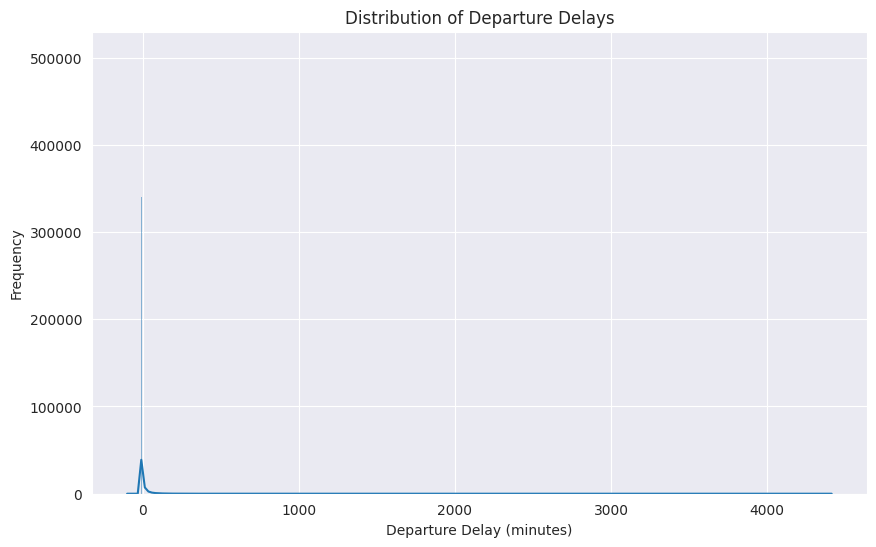

In [3]:
# Distribution of departure delays (Dep_Delay)
plt.figure(figsize=(10, 6))
sns.histplot(flights_df["Dep_Delay"], kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


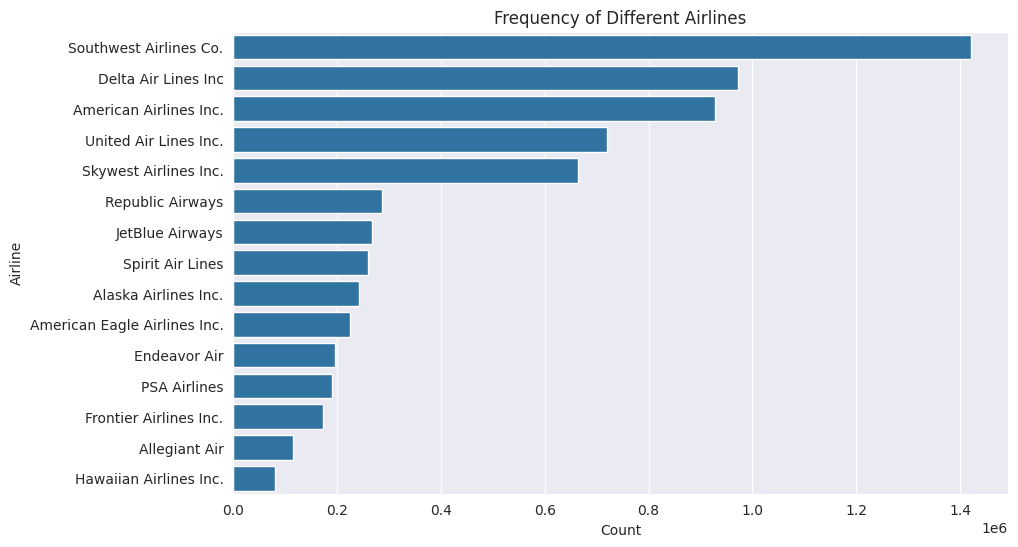

In [4]:
# Frequency of different airlines (Airline)
plt.figure(figsize=(10, 6))
sns.countplot(
    y="Airline", data=flights_df, order=flights_df["Airline"].value_counts().index
)
plt.title("Frequency of Different Airlines")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()


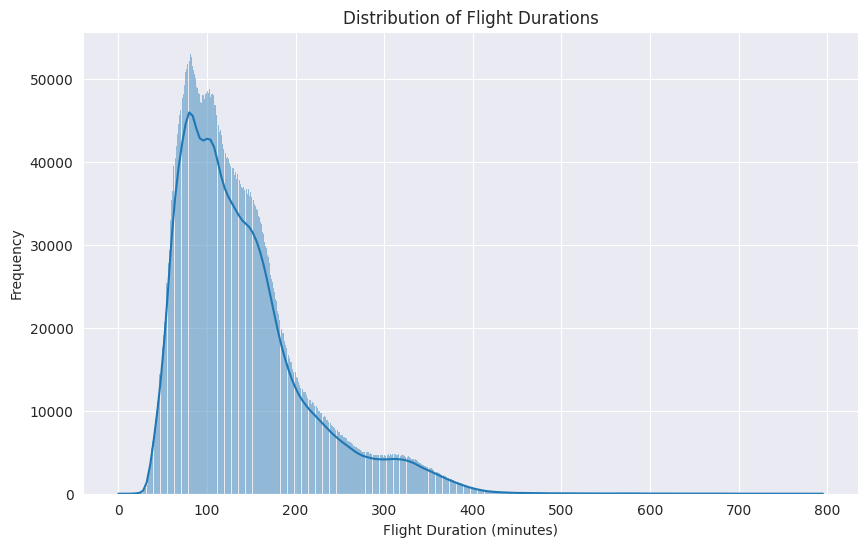

In [5]:
# Distribution of flight durations (Flight_Duration)
plt.figure(figsize=(10, 6))
sns.histplot(flights_df["Flight_Duration"], kde=True)
plt.title("Distribution of Flight Durations")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


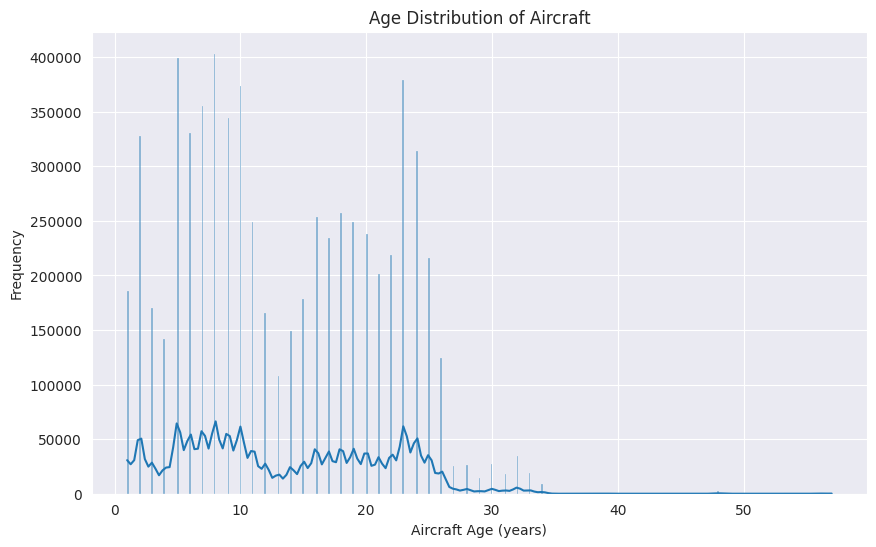

In [7]:
# Age distribution of the aircraft (Aircraft_age)
plt.figure(figsize=(10, 6))
sns.histplot(flights_df["Aicraft_age"], kde=True)
plt.title("Age Distribution of Aircraft")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Frequency")
plt.show()

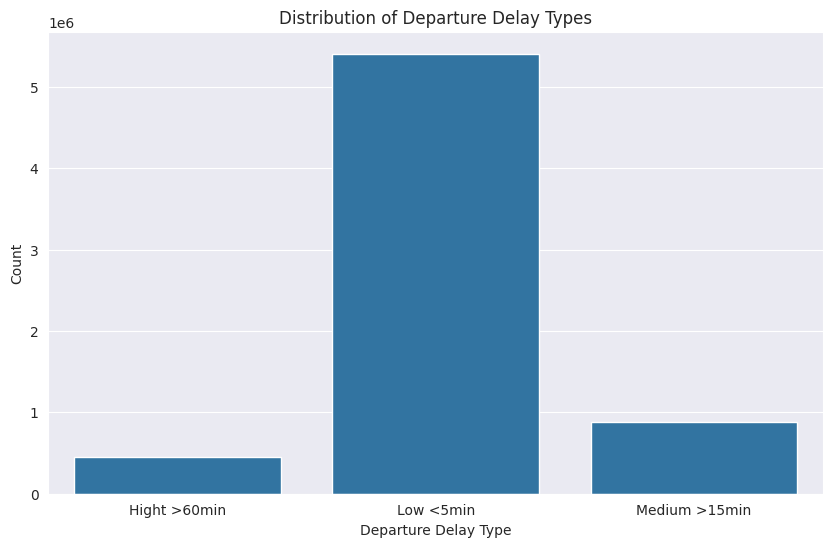

In [8]:
# Distribution of departure delay types (Dep_Delay_Type)
plt.figure(figsize=(10, 6))
sns.countplot(x="Dep_Delay_Type", data=flights_df)
plt.title("Distribution of Departure Delay Types")
plt.xlabel("Departure Delay Type")
plt.ylabel("Count")
plt.show()


In [ ]:
# Frequency distribution of departure cities (Dep_CityName)
plt.figure(figsize=(10, 6))
top_departure_cities = flights_df["Dep_CityName"].value_counts().nlargest(20).index
sns.countplot(
    y="Dep_CityName",
    data=flights_df[flights_df["Dep_CityName"].isin(top_departure_cities)],
    order=top_departure_cities,
)
plt.title("Top 20 Departure Cities")
plt.xlabel("Count")
plt.ylabel("Departure City")
plt.show()


In [ ]:
# Distribution of average temperature (tavg) across the dataset
plt.figure(figsize=(10, 6))
sns.histplot(weather_df["tavg"], kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Frequency of snow (snow) at different airports
plt.figure(figsize=(10, 6))
sns.histplot(weather_df["snow"], kde=True)
plt.title("Distribution of Snow Depth")
plt.xlabel("Snow Depth (mm)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Distribution of wind directions (wdir)
plt.figure(figsize=(10, 6))
sns.histplot(weather_df["wdir"], bins=36, kde=True)
plt.title("Distribution of Wind Directions")
plt.xlabel("Wind Direction (Degrees)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Percentage of canceled (Cancelled) and diverted (Diverted) flights
plt.figure(figsize=(10, 6))
cancelled_diverted_df["Cancelled"].value_counts(normalize=True).plot(
    kind="bar", color=["skyblue", "salmon"], rot=0
)
plt.title("Percentage of Canceled Flights")
plt.xlabel("Cancelled")
plt.ylabel("Percentage")
plt.show()

plt.figure(figsize=(10, 6))
cancelled_diverted_df["Diverted"].value_counts(normalize=True).plot(
    kind="bar", color=["skyblue", "salmon"], rot=0
)
plt.title("Percentage of Diverted Flights")
plt.xlabel("Diverted")
plt.ylabel("Percentage")
plt.show()


In [ ]:
# Common departure delay tags (Dep_Delay_Tag)
plt.figure(figsize=(10, 6))
sns.countplot(x="Dep_Delay_Tag", data=cancelled_diverted_df)
plt.title("Common Departure Delay Tags")
plt.xlabel("Departure Delay Tag")
plt.ylabel("Count")
plt.show()


 # Bivariate Analysis

In [ ]:
# Departure delay (Dep_Delay) across different days of the week (Day_Of_Week)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day_Of_Week", y="Dep_Delay", data=flights_df)
plt.title("Departure Delay by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay (minutes)")
plt.show()


In [ ]:
# Relationship between airline (Airline) and arrival delay (Arr_Delay)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Airline", y="Arr_Delay", data=flights_df)
plt.title("Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Departure delay (Dep_Delay) vs. flight duration (Flight_Duration)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Flight_Duration", y="Dep_Delay", data=flights_df)
plt.title("Departure Delay vs. Flight Duration")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Departure Delay (minutes)")
plt.show()


In [ ]:
# Aircraft age (Aircraft_age) vs. delay due to last aircraft (Delay_LastAircraft)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Aircraft_age", y="Delay_LastAircraft", data=flights_df)
plt.title("Aircraft Age vs. Delay Due to Last Aircraft")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Delay Due to Last Aircraft (minutes)")
plt.show()


In [ ]:
# Manufacturer (Manufacturer) vs. delay due to carrier (Delay_Carrier)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Manufacturer", y="Delay_Carrier", data=flights_df)
plt.title("Delay Due to Carrier by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Delay Due to Carrier (minutes)")
plt.show()


In [ ]:
# Average temperature (tavg) vs. wind speed (wspd)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="wspd", y="tavg", data=weather_df)
plt.title("Average Temperature vs. Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Average Temperature (°C)")
plt.show()


In [ ]:
# Precipitation (prcp) vs. weather-related delays (Delay_Weather)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="prcp", y="Delay_Weather", data=flights_df)
plt.title("Precipitation vs. Weather-Related Delays")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Weather-Related Delays (minutes)")
plt.show()


In [ ]:
# Cancellation (Cancelled) vs. departure delay (Dep_Delay)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cancelled", y="Dep_Delay", data=cancelled_diverted_df)
plt.title("Cancellation vs. Departure Delay")
plt.xlabel("Cancelled")
plt.ylabel("Departure Delay (minutes)")
plt.show()


In [ ]:
# Diverted (Diverted) vs. arrival delay (Arr_Delay)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Diverted", y="Arr_Delay", data=cancelled_diverted_df)
plt.title("Diverted vs. Arrival Delay")
plt.xlabel("Diverted")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


In [ ]:
# Day of the week (Day_Of_Week) vs. percentage of canceled flights
plt.figure(figsize=(10, 6))
cancelled_by_day = cancelled_diverted_df[cancelled_diverted_df["Cancelled"] == 1][
    "Day_Of_Week"
].value_counts(normalize=True)
cancelled_by_day.plot(kind="bar", color="skyblue")
plt.title("Percentage of Canceled Flights by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage of Canceled Flights")
plt.show()


 # Multivariate Analysis

In [ ]:
# Departure delay (Dep_Delay), day of the week (Day_Of_Week), and airline (Airline) interaction affecting arrival delay (Arr_Delay)
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="Day_Of_Week", y="Arr_Delay", hue="Airline", data=flights_df, split=True
)
plt.title("Arrival Delay by Day of the Week and Airline")
plt.xlabel("Day of the Week")
plt.ylabel("Arrival Delay (minutes)")
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
# Combined effect of aircraft age (Aircraft_age), flight duration (Flight_Duration), and weather delay (Delay_Weather) on total delay
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Aircraft_age",
    y="Delay_Weather",
    size="Flight_Duration",
    hue="Total_Delay",
    data=flights_df,
    palette="coolwarm",
)
plt.title("Aircraft Age, Flight Duration, and Weather Delay on Total Delay")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Weather Delay (minutes)")
plt.colorbar()
plt.show()


In [ ]:
# Departure airport (Dep_Airport), departure city (Dep_CityName), and departure delay type (Dep_Delay_Type) influence on arrival delay type (Arr_Delay_Type)
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="Dep_Delay_Type", y="Arr_Delay", hue="Dep_Airport", data=flights_df, split=True
)
plt.title("Arrival Delay by Departure Delay Type and Departure Airport")
plt.xlabel("Departure Delay Type")
plt.ylabel("Arrival Delay (minutes)")
plt.legend(title="Departure Airport", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
# Average temperature (tavg), wind speed (wspd), and precipitation (prcp) affecting weather-related delays (Delay_Weather) at different airports
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tavg",
    y="Delay_Weather",
    hue="prcp",
    size="wspd",
    data=flights_df,
    palette="viridis",
)
plt.title(
    "Temperature, Wind Speed, Precipitation, and Weather Delays at Different Airports"
)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Weather-Related Delay (minutes)")
plt.colorbar()
plt.show()


In [ ]:
# Combined effect of flight duration (Flight_Duration), day of the week (Day_Of_Week), and NAS delay (Delay_NAS) on overall flight delay (Arr_Delay)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Flight_Duration",
    y="Arr_Delay",
    hue="Delay_NAS",
    size="Day_Of_Week",
    data=flights_df,
    palette="plasma",
)
plt.title("Flight Duration, Day of the Week, and NAS Delay on Overall Flight Delay")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.colorbar()
plt.show()
